# STA130 HW03
___
## 1.)

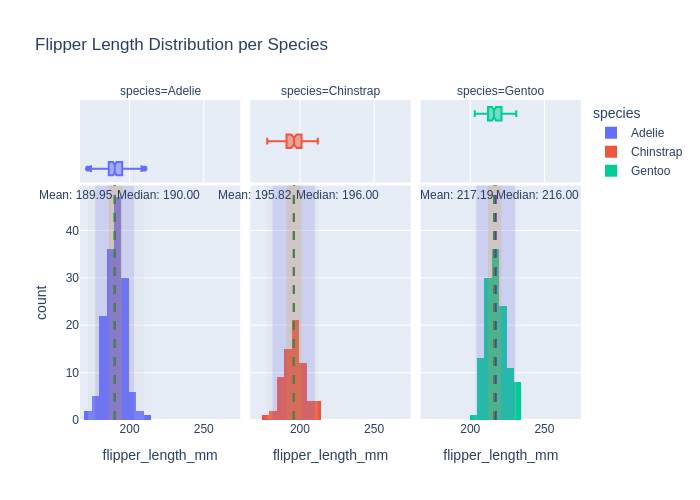

In [19]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Load the penguins dataset from the provided URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Create a histogram for flipper_length_mm, faceted by species
fig = px.histogram(penguins, x='flipper_length_mm', color='species', facet_col='species', 
                   marginal='box', nbins=20, title='Flipper Length Distribution per Species')

# Iterate over each species to calculate stats and add markers
species_list = penguins['species'].unique()

for species in species_list:
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate location statistics
    mean_flipper = data.mean()
    median_flipper = data.median()
    
    # Calculate scale statistics
    min_flipper = data.min()
    max_flipper = data.max()
    q1_flipper = data.quantile(0.25)
    q3_flipper = data.quantile(0.75)
    std_flipper = data.std()
    
    lower_2std = mean_flipper - 2 * std_flipper
    upper_2std = mean_flipper + 2 * std_flipper
    
    # Get the index of the subplot for the current species
    col_idx = species_list.tolist().index(species) + 1
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean_flipper, line_dash="dash", line_color="blue",
                  annotation_text=f"Mean: {mean_flipper:.2f}", annotation_position="top left", 
                  row=1, col=col_idx)
    
    fig.add_vline(x=median_flipper, line_dash="dash", line_color="green",
                  annotation_text=f"Median: {median_flipper:.2f}", annotation_position="top right", 
                  row=1, col=col_idx)
    
    # Add horizontal rectangles for scale
    # Range (min, max)
    fig.add_vrect(x0=min_flipper, x1=max_flipper, line_width=0, fillcolor="lightgray", opacity=0.2, 
                  row=1, col=col_idx)

    # Interquartile range (Q1, Q3)
    fig.add_vrect(x0=q1_flipper, x1=q3_flipper, line_width=0, fillcolor="orange", opacity=0.2, 
                  row=1, col=col_idx)

    # Two standard deviations from the mean
    fig.add_vrect(x0=lower_2std, x1=upper_2std, line_width=0, fillcolor="blue", opacity=0.1, 
                  row=1, col=col_idx)

# Show the figure
fig.show(renderer="png")

___
## 2.)

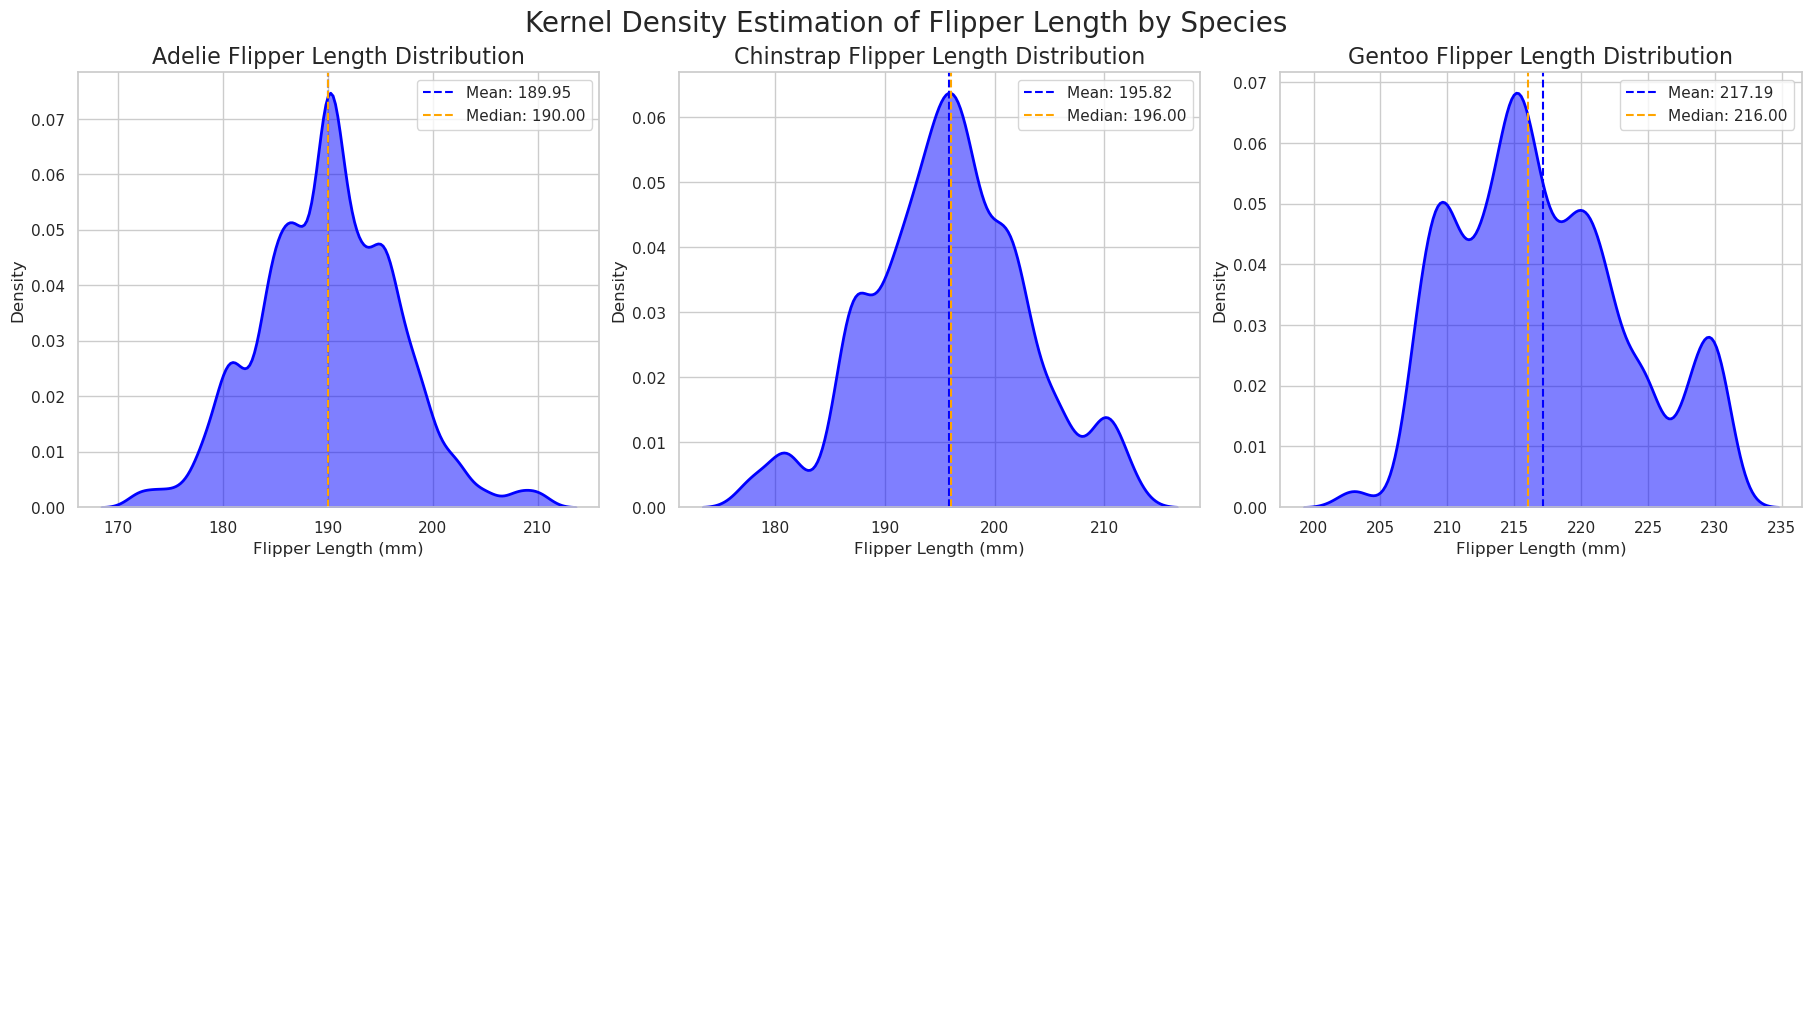

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset from the provided URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Set the aesthetics for the plots
sns.set_style("whitegrid")  # Set style to whitegrid
sns.set_palette("colorblind")  # Set color palette

# Create a figure with a specified size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of unique species
species_list = penguins['species'].unique()

# Iterate over each species to create KDE plots
for idx, species in enumerate(species_list):
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Plot the KDE for the current species
    sns.kdeplot(data, ax=axes[idx], fill=True, alpha=0.5, bw_adjust=0.5, 
                 color='blue', linewidth=2)
    
    # Calculate mean and median
    mean_flipper = data.mean()
    median_flipper = data.median()
    
    # Add vertical lines for mean and median
    axes[idx].axvline(mean_flipper, color='blue', linestyle='--', label=f'Mean: {mean_flipper:.2f}')
    axes[idx].axvline(median_flipper, color='orange', linestyle='--', label=f'Median: {median_flipper:.2f}')
    
    # Set titles and labels
    axes[idx].set_title(f'{species.capitalize()} Flipper Length Distribution', fontsize=16)
    axes[idx].set_xlabel('Flipper Length (mm)', fontsize=12)
    axes[idx].set_ylabel('Density', fontsize=12)
    axes[idx].legend()

# Hide any empty subplots
for ax in axes[len(species_list):]:
    ax.axis('off')

# Show the plot
plt.suptitle('Kernel Density Estimation of Flipper Length by Species', fontsize=20)
plt.show()

___

## 3.)

### Penguins Flipper Length Analysis
The relevant transcripts are found at the bottom

https://chatgpt.com/share/66f3900c-9e54-8011-999b-347c2e6f09f5

*Describe your preference for one or the other and your rationale for this preference*
- I prefer histograms more because how effectively it illustrates the distribution of the data and when specifically compared to KDEs, they look much simpler to interpret and analyze. Another thing I observed is that you can control how detailed the histogram would be while KDEs give a broader view of the distribution and box plots are usually just quick overviews of the data.

___
## 4.)


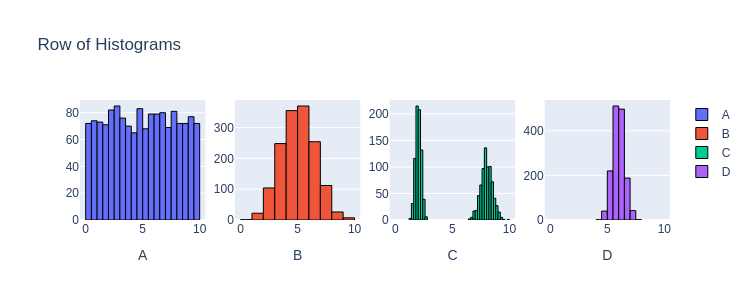

In [27]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

*Which datasets have similar means and similar variances*

- A and C have very similar means (\~5.0) and similar variances (~8.5 and 9.2)

*Which datasets have similar means but quite different variances*

- B and C have similar means (\~5.0) but quite different variances (\~2.26 vs. \~9.23).

*Which datasets have similar variances but quite different means*

- B and D have similar variances (\~2.26 and \~0.25) but quite different means (\~5.01 vs. \~6.01).

*Which datasets have quite different means and quite different variances*

- D has both a different mean (\~6.01) and a much lower variance (\~0.25) compared to the other datasets, specifically to C.

(I'm defining similar as two datasets having values that are close to each other. I'm counting \~2.26 and \~0.25 as kind of similar for the third question because it seems like the correct answer. The definition of similar and different are kinda blurry, sorry)

___
## 5.)

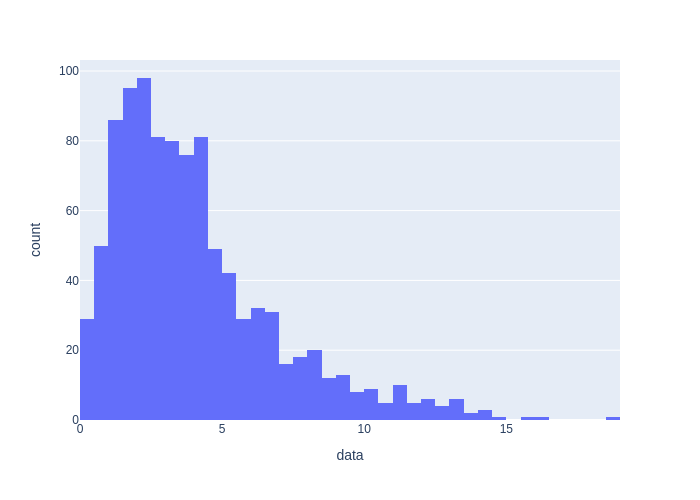

In [62]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

fig1.show(renderer="png")

*Explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this*

### Difference between Mean and Median

The mean and the median are both measures of central tendency that summarize the data in different ways and for different reasons. 

The mean is the average of all the values in the dataset which means it is calculated by adding all the values in the dataset and dividing the sum by the number of values. It represents the "typical" value when the data is normally distributed or symmetric. 

The median, on the other hand, is the middle value in the dataset when all the values are sorted in ascending or descending order. When the number of values is even, we calculate the average of the two middle numbers. The median is particularly useful if the dataset is skewed or contains outliers because the middle value is unaffected by extreme data points. 

### The relationship between Mean, Median and Skewness

When the data has no skew or is evenly distributed on both sides of the center, then that means the mean and median are equal.

When there's a 'right' skewness, then that means the distribution is positively skewed. This means that the mean is pulled towards the higher end (or the right tail). The mean is greater than the median when there is a 'right' skewness.

In a left-skewed distribution, or negatively skewed distribution, the mean is pulled towards the lower end (the left tail. The mean is less than the median in this case.

### Why this happens

As the mean is calculated by adding all the values in the dataset, the mean can be influenced by extreme values. When that happens, the mean is 'pulled' towards the direction of whichever side the extreme values are mostly in (left - more or extremely lower values, right - more or extremely high values). The median will be unaffected, however, as the way to get the median is to find the middle value of the dataset sorted in ascending or descending order -- so the median doesn't really get influenced by whether extreme values are present or not.



The mean for sample1 is: 
3.9152016868636434

The median for sample1 is: 
[3.18258971]


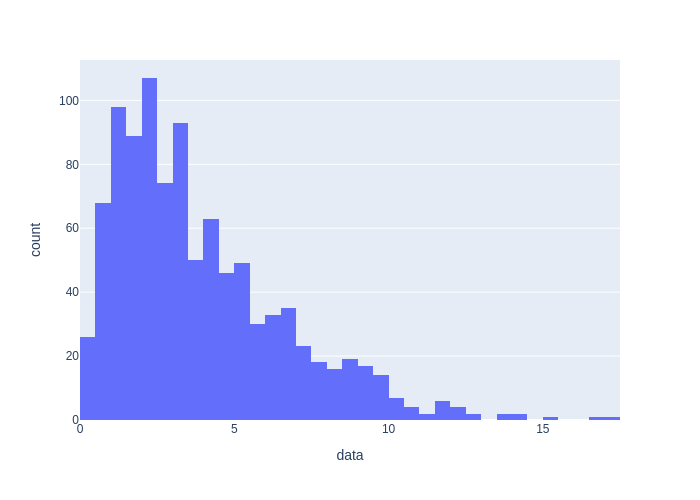

The mean for sample2 is: 
-4.069322966047204

The median for sample2 is: 
[-3.35314123]


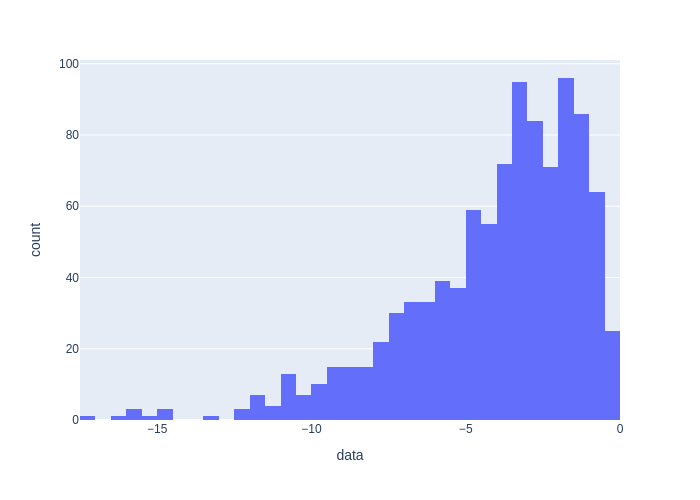

In [63]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate a random sample of 1000 values from a gamma distribution with shape parameter a = 2 and scale parameter scale = 2
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)

# Create a histogram to visually represent sample1 data
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

# Prints the calculated mean for sample1 
print("The mean for sample1 is: ")
print(sample1.mean())

# Prints the median for sample1 
print("\nThe median for sample1 is: ")
print(np.quantile(sample1, [0.5])) # median

# Displays the histogram for sample1
fig1.show(renderer="png")

# We can observe that fig1 represents a right-skewed distribution, and as ChatGPT explained: "typical of Gamma distributions (only positive values)"
# The mean is greater than the median. (Explanation in markdown) 
# We can infer that the mean is influenced by more higher end values which is why its being pulled to the right tail.


# Generate another random sample of 1000 values from a gamma distribution with shape parameter a = 2 and scale parameter scale = 2 but negates the values
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

# Create a histogram to visually represent sample2 data
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

# Prints the calculated mean for sample2 
print("The mean for sample2 is: ")
print(sample2.mean())

# Prints the median for sample2
print("\nThe median for sample2 is: ")
print(np.quantile(sample2, [0.5])) # median

# Displays the histogram for sample2
fig2.show(renderer="png")

# We can observe that fig2 represents a left-skewed distribution, and as ChatGPT explained: "representing the negative values of the Gamma distribution"
# The mean is less than the median. (Explanation in markdown)
# We can infer that the mean is influenced by more lower end values which is why its being pulled to the left tail.


___
## 6.)

In [52]:
import pandas as pd

# Nutritional database focusing on different fast food items from different fast food chains
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

df

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [24]:
# Check for missing values
null_values = df.isnull().sum()
print(null_values)

restaurant id                      0
category id                        0
item id                            0
serving size (oz)                355
calories                           0
calories from fat                490
total fat (g)                      0
total fat (% daily value)        490
saturated fat (g)                113
saturated fat (% daily value)    490
trans fat (g)                    113
cholesterol (mg)                 113
cholesterol (% daily value)      490
sodium (mg)                      113
sodium (% daily value)           490
carbohydrates (g)                  0
carbohydrates (% daily value)    490
dietary fiber (g)                  0
dietary fiber (% daily value)    490
sugars (g)                       113
protein (g)                        0
vitamin a (% daily value)        113
vitamin c (% daily value)        113
calcium (% daily value)          113
iron (% daily value)             113
dtype: int64


In [25]:
# Make sure to drop missing values
df_cleaned = df.dropna()

# Summary statistics for numerical columns
summary_stats = df_cleaned.describe()
print(summary_stats)

       restaurant id  category id     item id  serving size (oz)     calories  \
count          260.0   260.000000  260.000000         260.000000   260.000000   
mean          1000.0   104.711538  129.500000          12.858032   368.269231   
std              0.0     2.919357   75.199734           6.988335   240.269886   
min           1000.0   100.000000    0.000000           1.000000     0.000000   
25%           1000.0   102.000000   64.750000           6.975000   210.000000   
50%           1000.0   106.000000  129.500000          12.000000   340.000000   
75%           1000.0   107.000000  194.250000          16.000000   500.000000   
max           1000.0   108.000000  259.000000          32.000000  1880.000000   

       calories from fat  total fat (% daily value)  saturated fat (g)  \
count         260.000000                 260.000000         260.000000   
mean          127.096154                  21.815385           6.007692   
std           127.875914                  21.885

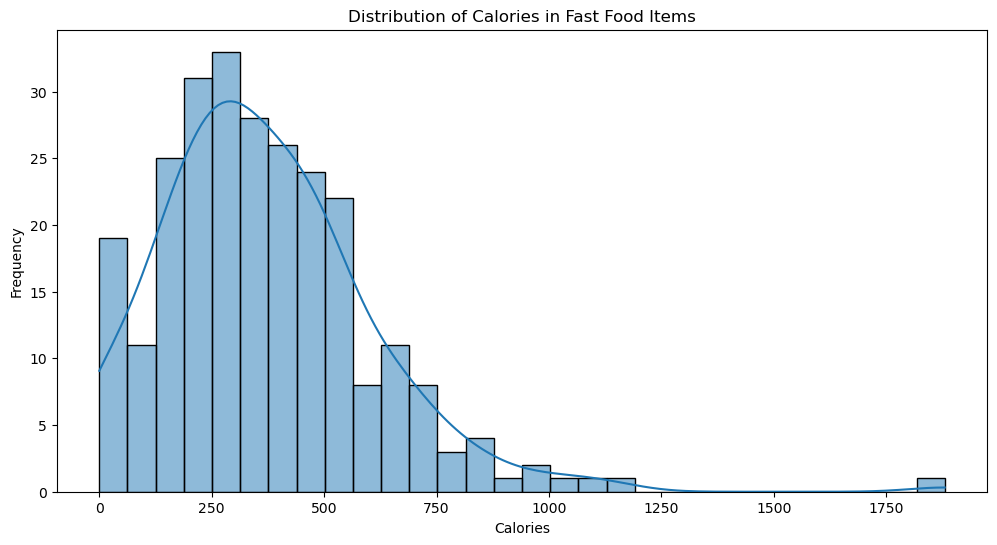

In [45]:
# Suppose we want to show how calories are distributed across fast food items

plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['calories'], bins=30, kde=True)
plt.title('Distribution of Calories in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# We can see that the histogram is right-skewed, which means there are more higher end extreme values. Very unhealthy.
# The 'kde=True' provides a smoother representation of the distribution.

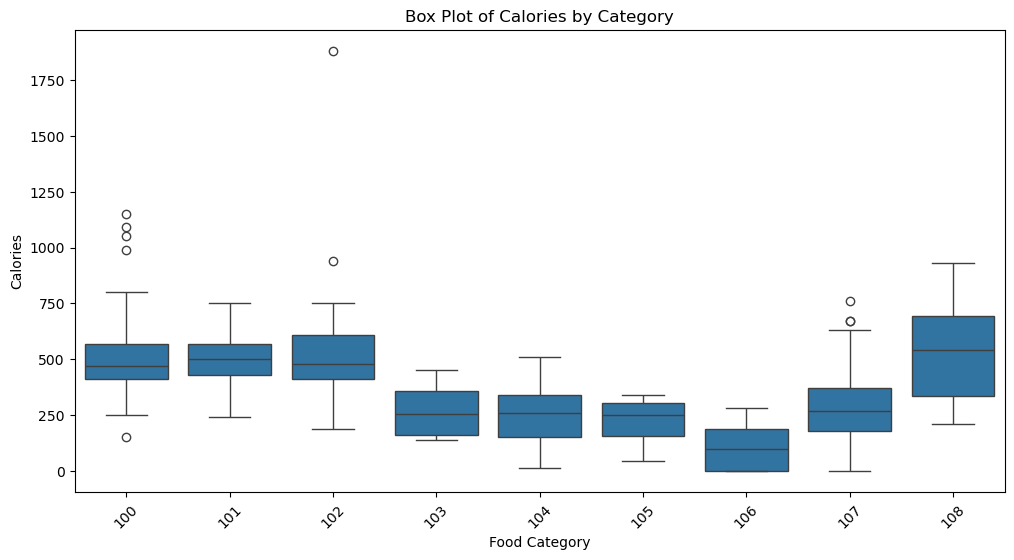

In [54]:
# Suppose we would also like to examine the spread of the distribution of calories by category.

plt.figure(figsize=(12, 6))
sns.boxplot(x='category id', y='calories', data=df_cleaned)
plt.title('Box Plot of Calories by Category')
plt.xlabel('Food Category')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()

___
## 7.)

In [59]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", template="plotly_dark",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

___
## 8.)


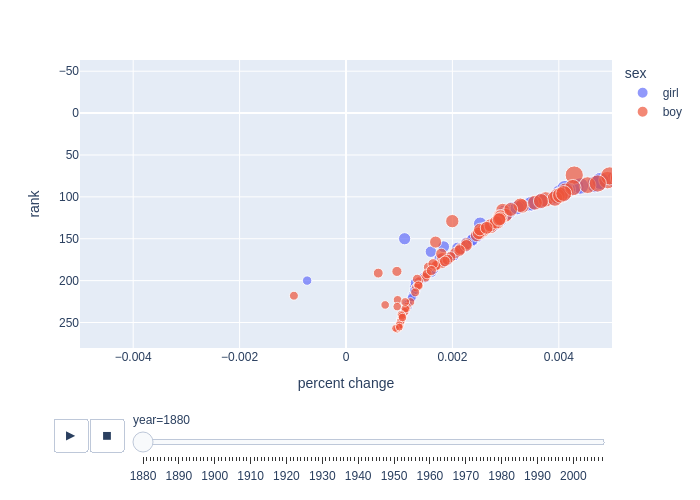

In [61]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

___
## 9.)

Somewhat

___

## ChatGPT Chat Log Summaries:

### Mean vs Median Relationship

https://chatgpt.com/share/66f4db18-474c-8011-a314-61201225e5d4

### Penguins Flipper Length Analysis

https://chatgpt.com/share/66f3900c-9e54-8011-999b-347c2e6f09f5